In [18]:
# Feature Selection

**Some Feature Selection Techniques**

1.   Remove unused columns
2.   Drop columns with missing values (we covered this)
3.   Uncorrelated Features (we covered this)
- Numeric
- Categorical
4.  Low Variance Features
5.  Multicollinearity
- Numeric
- Categorical
5.  Feature coefficients
6.  p-value
7.  Variance Inflation Factor (VIF)
8.  Feature Importance / impurity based feature selection
9.  Automate feature selection with sklearn (chi-squared, regulariation, sequential selection)
10.  Principal Component Analysis



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
146,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
49,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [21]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Remove Unused Columns

In [23]:
# examples:  ID, First Name, Last name
# Drop unused columns
# data.drop(columns=['column_name1', 'column_name2'], inplace=True)

# Drop Columns with Missing Values (we covered this earlier)

In [ ]:
# total null values per column
# impute (replace with mean/median/mode) or fillna(), dropna()
df.isnull().sum()

In [ ]:
missing_percentage_columns = (df.isnull().sum() / len(df)) * 100
missing_percentage_columns

In [ ]:
missing_percentage_rows = (df.isnull().sum(axis=1) / df.shape[1]) * 100
missing_percentage_columns

In [27]:
# Impute (replace missing values with the mean, median, or mode)
# df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
# df['column_name'] = df['column_name'].fillna(df['column_name'].median())
# df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])
# drop Rows with Missing Values:  df.dropna(inplace=True)
# drop Cols with Missing Values:  df.dropna(axis=1, inplace=True)


In [29]:
threshold = 0.9
df.drop(columns=df.columns[df.isnull().mean() > threshold], inplace=True)
# df.drop(columns=df.columns[df.isnull().mean() > threshold], inplace=True)

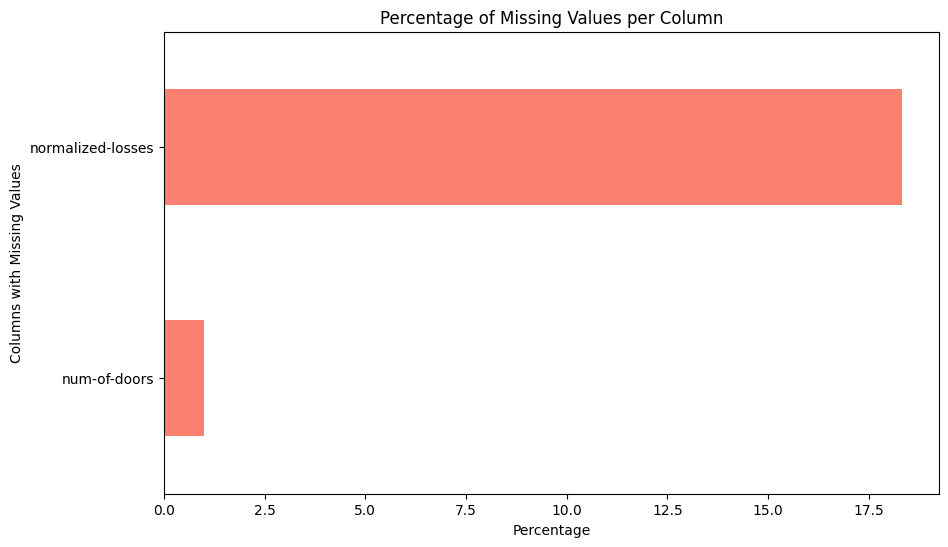

In [30]:
# Visualizing columns with missing values in the dataset

missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10,6))
missing_percentage.sort_values().plot(kind='barh', color='salmon')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Percentage")
plt.ylabel("Columns with Missing Values")
plt.show()


# Uncorrelated Features (both numeric and categorical)

<ipython-input-31-c91c15c602a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr().loc['price'].plot(kind='barh', figsize=(4,10)))


<Axes: >

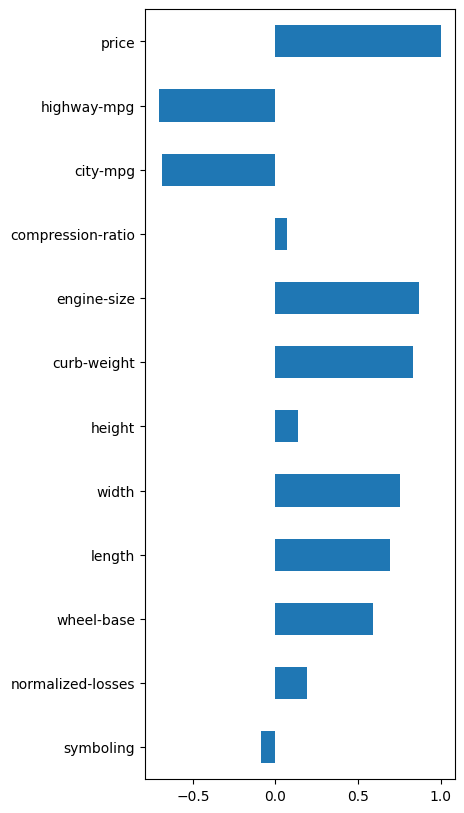

In [31]:
# correlation between target and features
# THIS IS FOR NUMERIC DATA ONLY
(df.corr().loc['price'].plot(kind='barh', figsize=(4,10)))

In [32]:
# drop uncorrelated numeric features (threshold <0.2)
corr = abs(df.corr().loc['price'])
corr = corr[corr<0.2]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)

<ipython-input-32-1bc1125743d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(df.corr().loc['price'])


<ipython-input-33-c5cf5c707731>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr().loc['price'].plot(kind='barh', figsize=(4,10)))


<Axes: >

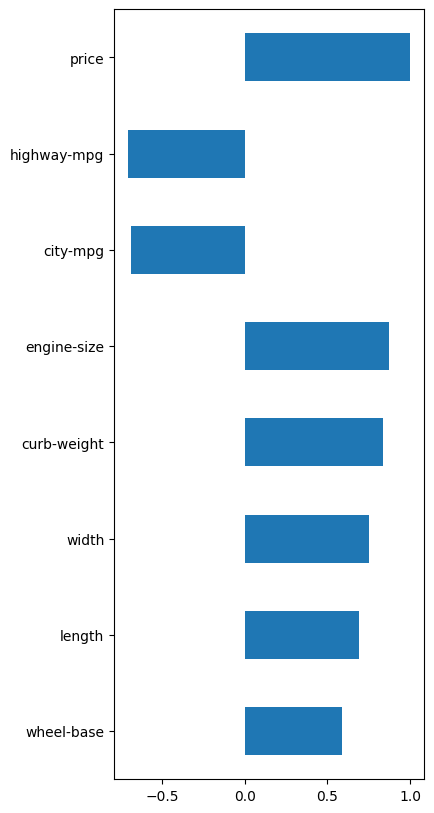

In [33]:
# correlation between target and features
# THIS IS FOR NUMERIC DATA ONLY
(df.corr().loc['price'].plot(kind='barh', figsize=(4,10)))

<Axes: xlabel='fuel-type', ylabel='price'>

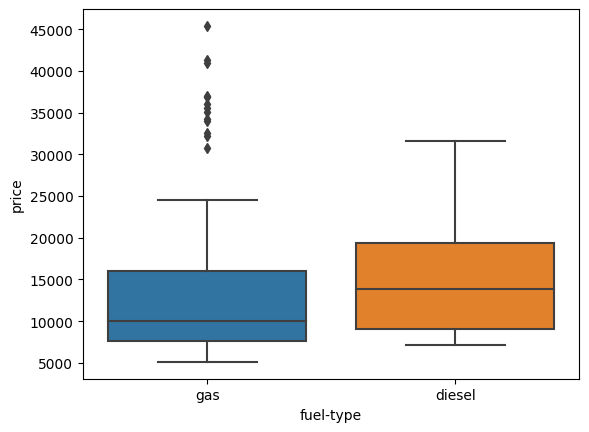

In [34]:
# Categorical Features (use boxplots)
import seaborn as sns
sns.boxplot(y = 'price', x = 'fuel-type', data=df)

# Low Variance Features

In [36]:
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
159,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8058
108,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580
87,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552


In [37]:
import numpy as np
# variance of numeric features
(df
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

# if these values are LOW then the variance is low and you can CONSIDER removing them
# but only after careful consideration.  If it is ZERO OR if is 100 AND categorical... definitely remove

symboling            1.5834687946406583
normalized-losses    1252.9059866962307
wheel-base           37.143205014531304
length                152.1356997192256
width                 4.439088714841637
height                5.976896704595834
curb-weight           267533.7558987242
engine-size          1718.5393084084524
compression-ratio    15.962133343185062
city-mpg              41.24151519629575
highway-mpg           46.37527707994679
price                63280745.699620694
dtype: object

# Multicollinearity (numeric and categorical)

In [39]:
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5).T

,172,179,135,184,132
symboling,-1,2,2,2,3
normalized-losses,65.0,122.0,83.0,94.0,150.0
make,toyota,volkswagen,subaru,volkswagen,saab
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,turbo
num-of-doors,four,two,two,four,two
body-style,sedan,sedan,hatchback,sedan,hatchback
drive-wheels,fwd,fwd,fwd,fwd,fwd
engine-location,front,front,front,front,front
wheel-base,102.4,97.3,93.7,97.3,99.1


In [ ]:
# Numeric Features - heatmaps are the simplest way to visually inspect and look for correlated features

<ipython-input-41-1cca233482ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


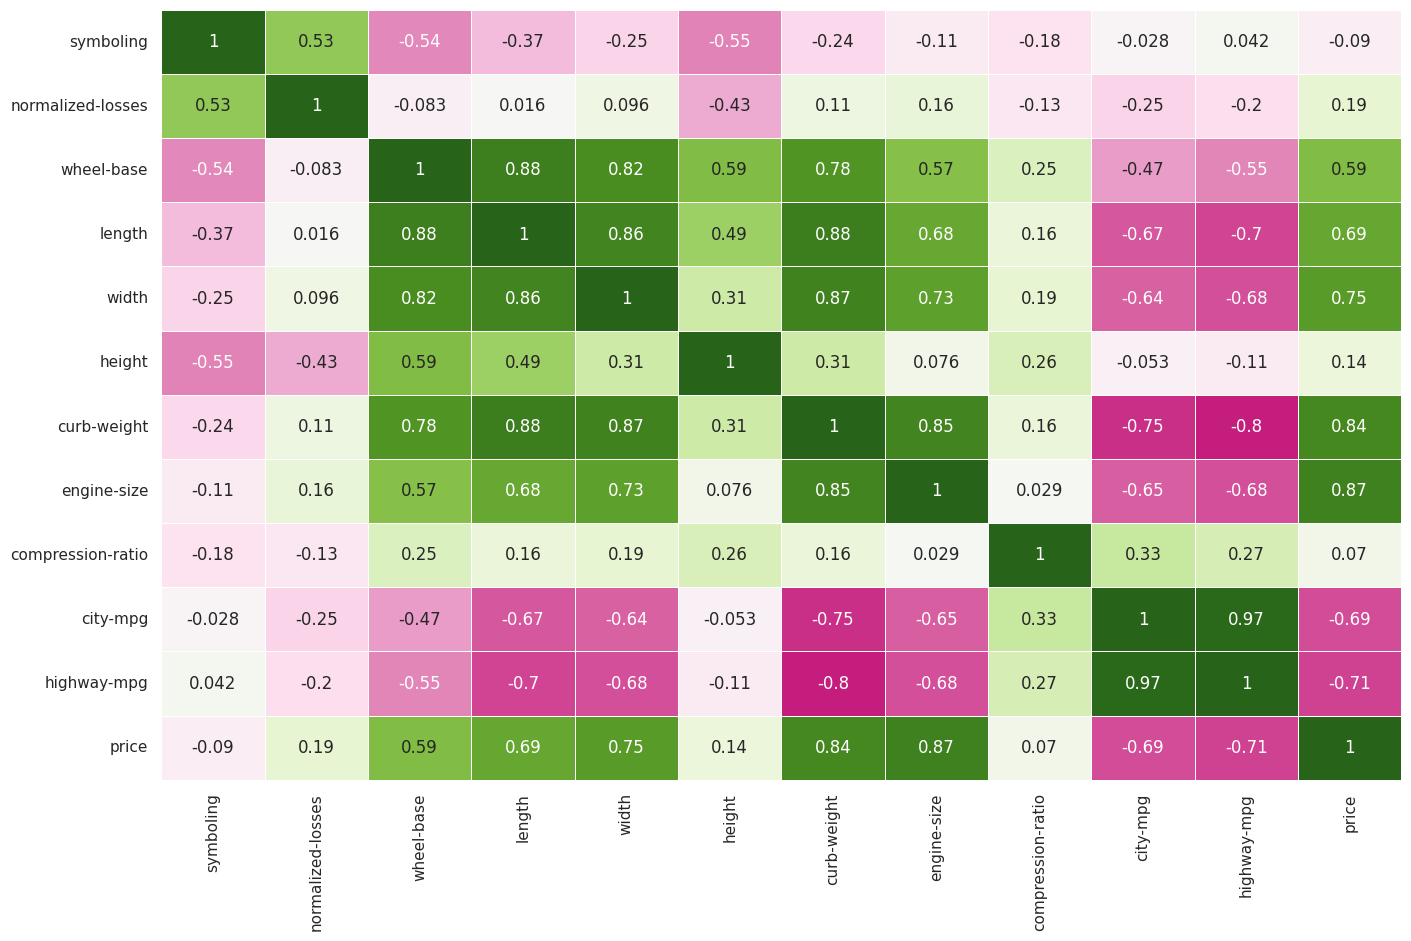

In [41]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [42]:
# drop correlated features
df = df.drop(['length', 'width', 'curb-weight', 'engine-size', 'city-mpg'], axis=1)

In [ ]:
# Categorical / Binary # chi-squared test of independence *

In [43]:
df_cat = df[['fuel-type', 'body-style']]
df_cat.sample(5)

,fuel-type,body-style
190,gas,sedan
181,gas,sedan
152,gas,sedan
149,gas,wagon
94,gas,wagon


In [44]:
crosstab = pd.crosstab(df_cat['fuel-type'], df_cat['body-style'])
crosstab

body-style,convertible,hardtop,hatchback,sedan,wagon
fuel-type,,,,,
diesel,0,1,1,15,3
gas,6,7,67,80,22


In [45]:
from scipy.stats import chi2_contingency
chi2_contingency(crosstab)
# if the p-value is <0.05 there IS a statistically significant relationship between the features
# Because there is a relationship - we can drop one of these (multicollinearity exists)

Chi2ContingencyResult(statistic=9.953585564590208, pvalue=0.04121682705941806, dof=4, expected_freq=array([[ 0.59405941,  0.79207921,  6.73267327,  9.40594059,  2.47524752],
       [ 5.40594059,  7.20792079, 61.26732673, 85.59405941, 22.52475248]]))

# Model Based Feature Selection

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
178,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775
62,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
164,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
35,0,78.0,honda,gas,std,four,wagon,fwd,front,96.5,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295


In [47]:
# drop columns with missing values
df = df.dropna()
from sklearn.model_selection import train_test_split
# get dummies for categorical features
df = pd.get_dummies(df, drop_first=True)
# X features
X = df.drop('price', axis=1)
# y target
y = df['price']
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
# scaling
# must be scaled or normalized for this technique to work
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# convert back to dataframe
X_train = pd.DataFrame(X_train, columns = X.columns.to_list())
X_test = pd.DataFrame(X_test, columns = X.columns.to_list())
# instantiate model
model = LinearRegression()
# fit
model.fit(X_train, y_train)

LinearRegression()

<Axes: >

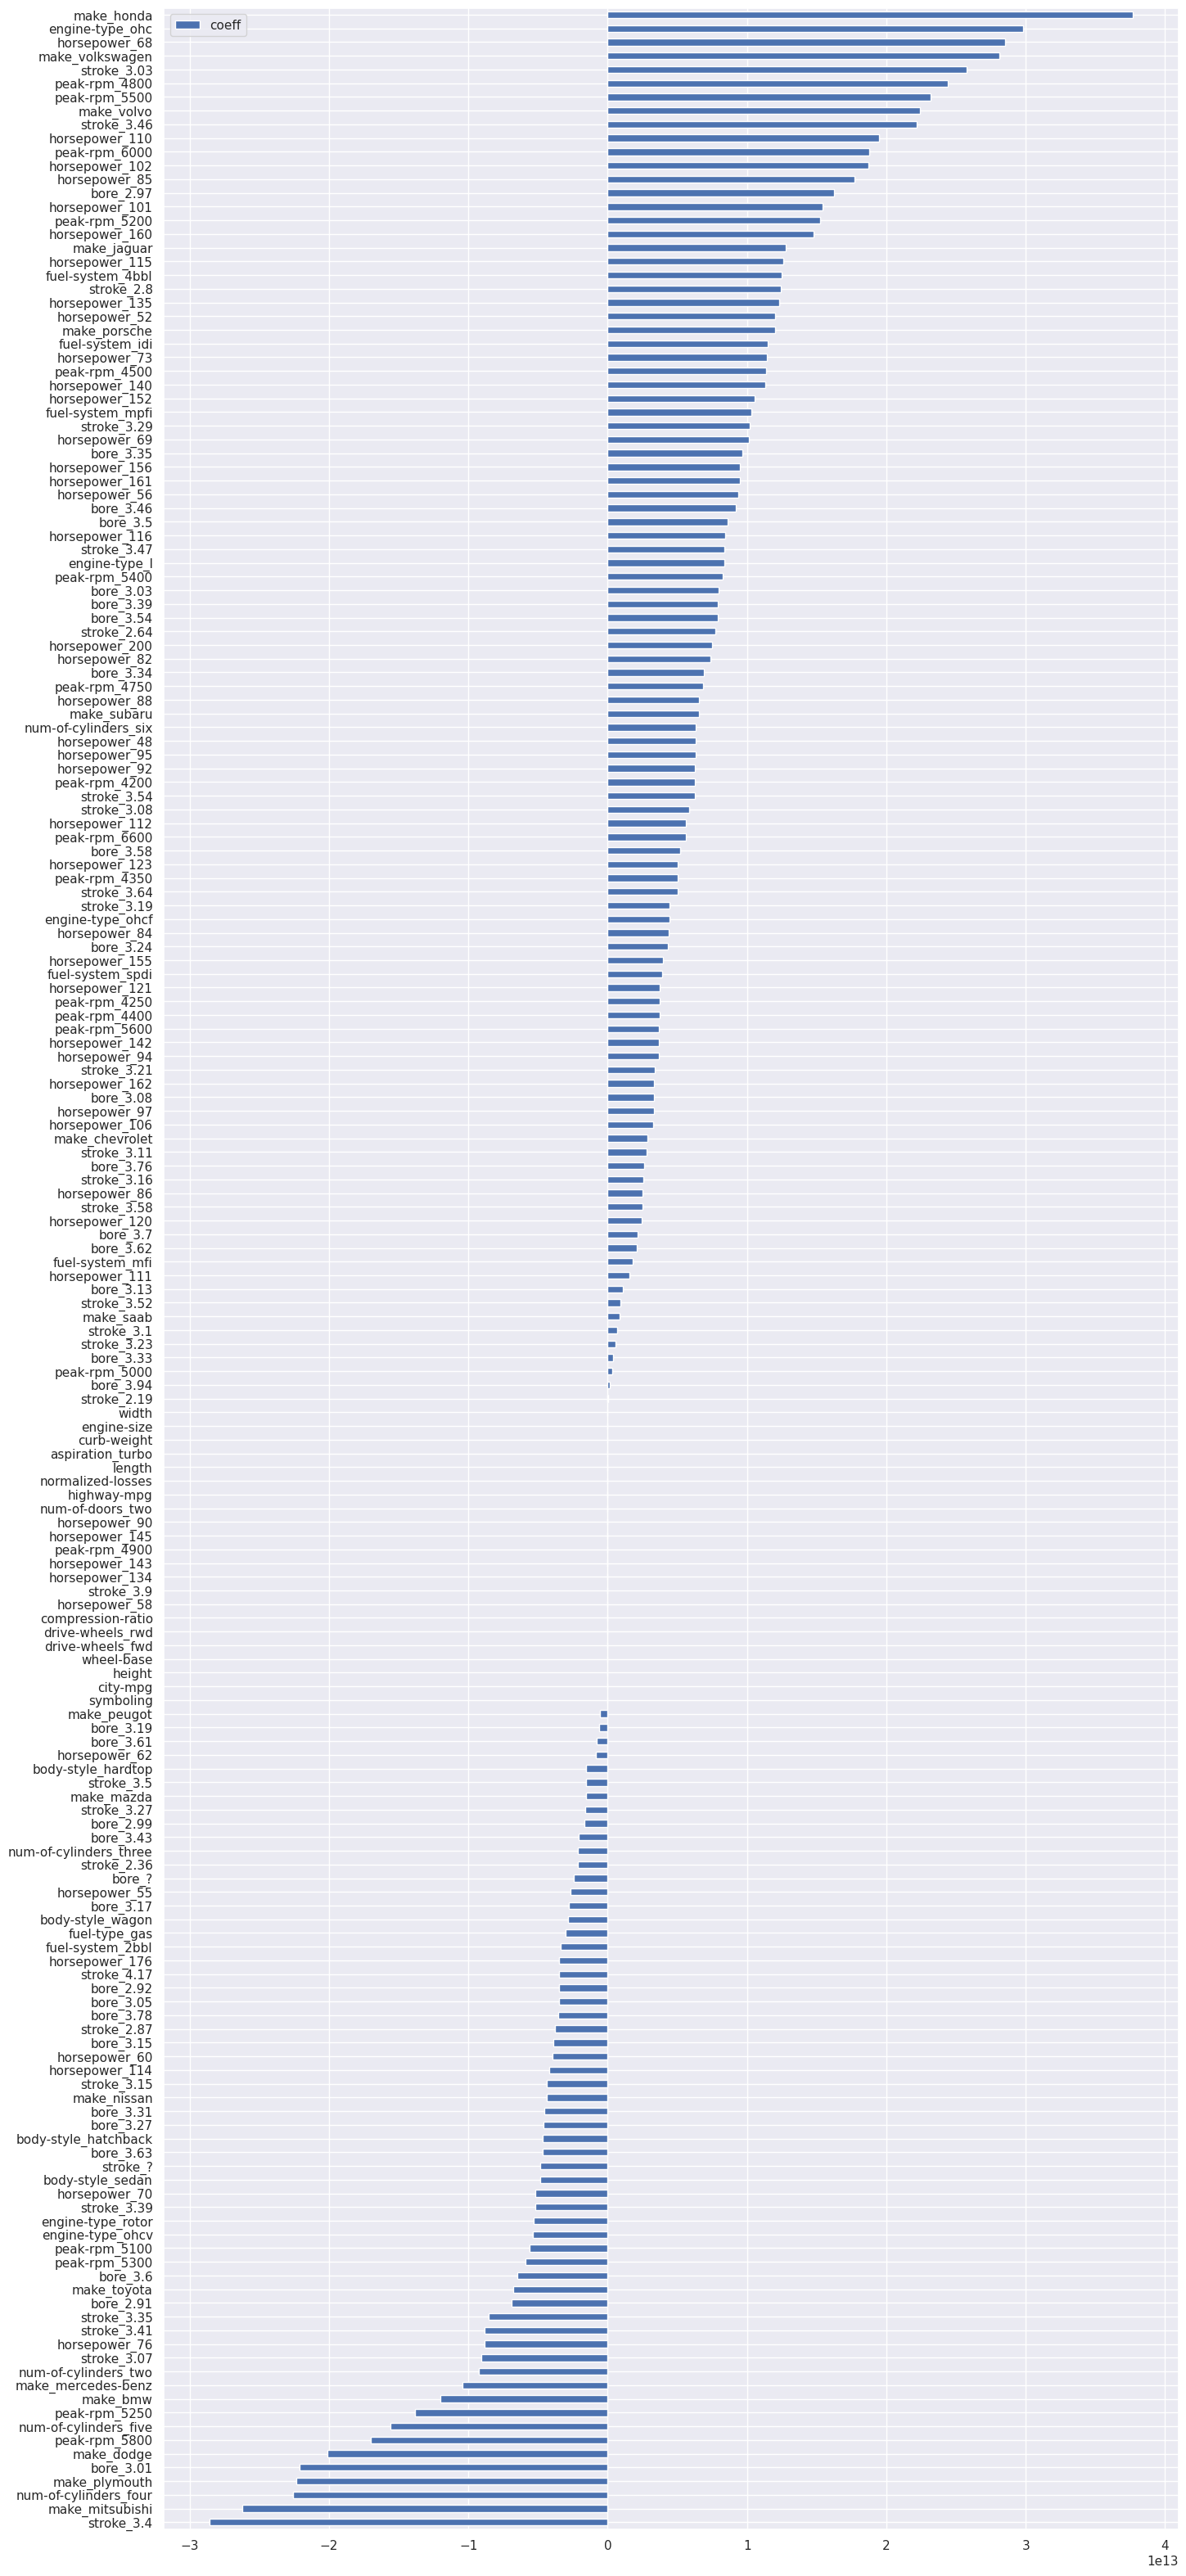

In [50]:
# feature coefficients
coeffs = model.coef_
# visualizing coefficients
index = X_train.columns.tolist()
(pd.DataFrame(coeffs, index = index, columns = ['coeff']).sort_values(by = 'coeff')
 .plot(kind='barh', figsize=(16,40)))

# Feature Coefficients

In [51]:
# filter variables near zero coefficient value
temp = pd.DataFrame(coeffs, index = index, columns = ['coeff']).sort_values(by = 'coeff')
temp = temp[(temp['coeff']>1) | (temp['coeff']< -1)]
# drop those features
cols_coeff = temp.index.to_list()
X_train = X_train[cols_coeff]
X_test = X_test[cols_coeff]

In [53]:
X_train.columns

Index(['stroke_3.4', 'make_mitsubishi', 'num-of-cylinders_four',
       'make_plymouth', 'bore_3.01', 'make_dodge', 'peak-rpm_5800',
       'num-of-cylinders_five', 'peak-rpm_5250', 'make_bmw',
       ...
       'horsepower_110', 'stroke_3.46', 'make_volvo', 'peak-rpm_5500',
       'peak-rpm_4800', 'stroke_3.03', 'make_volkswagen', 'horsepower_68',
       'engine-type_ohc', 'make_honda'],
      dtype='object', length=178)

# p-value

In [ ]:
# Regression... the p-value tells us whether the relationship
# between a predictor (feature) and a target is statistically significant.  statsmodel

In [54]:
import statsmodels.api as sm
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     50.02
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.38e-43
Time:                        15:20:09   Log-Likelihood:                -1315.9
No. Observations:                 164   AIC:                             2814.
Df Residuals:                      73   BIC:                             3096.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
symboling                -77

# Variance Inflation Factor (VIF)

In [56]:
# VIF = 1 means no correlation   ,   1-5 moderate correlation,   VIF > 5 high correlation
import pandas as pd
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964
155,0,91.0,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895
49,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
188,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculate VIF
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
# display VIFs in a table
index = X_train.columns.tolist()
vif_df = pd.DataFrame(vif, index = index, columns = ['vif']).sort_values(by = 'vif', ascending=False)
vif_df[vif_df['vif']<10]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
body-style_hardtop,7.566386
num-of-doors_two,6.456397


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [59]:
index = X_train.columns.tolist()
vif_df = pd.DataFrame(vif, index = index, columns = ['vif']).sort_values(by = 'vif', ascending=False)
vif_df[vif_df['vif']<10]

,vif
body-style_hardtop,7.566386
num-of-doors_two,6.456397
